In [136]:
import numpy as np
import pandas as pd
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 


dataSet = sp.loadmat('C:\\Users\\junda\\OneDrive\\Bureau\\breastw.mat')
X = dataSet['X']
y = dataSet['y']
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

skf = StratifiedKFold(n_splits=2,shuffle=True)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]


np.shape(y_train)

#print (y_test)


(342, 1)

In [137]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score

gmm = GaussianMixture(n_components=2, covariance_type ='full', random_state = 0, max_iter=100)
gmm.fit(X_train,y_train)
y_pred = gmm.predict(X_test)

if precision_score(y_test,y_pred)< 0.15:
    print (precision_score(y_test,y_pred))
    y_pred = np.array([0 if label == 1 else 1 for label in y_pred])
    probas = 1-gmm.predict_proba(X_test)
    probas = probas[:, 1]
else :
    probas = gmm.predict_proba(X_test)
    probas = probas[:, 1]


# keep probabilities for the positive outcome only

  
print (y_pred)
#np.shape(y_pred)


0.0
[0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 1 1]


In [138]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       222
           1       0.82      1.00      0.90       119

    accuracy                           0.92       341
   macro avg       0.91      0.94      0.92       341
weighted avg       0.94      0.92      0.93       341



0.9414414414414414


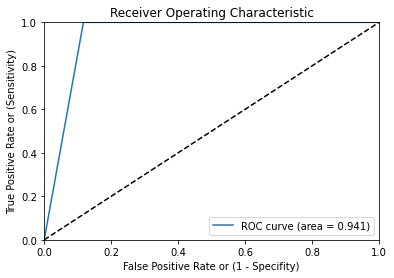

In [139]:
print(roc_auc_score(y_test,y_pred))


from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


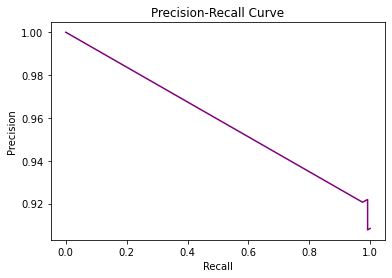

In [140]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test,probas)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()